<a href="https://colab.research.google.com/github/Wolf-gangSE/diabetes-prediction/blob/main/IA_ProjetoI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-plot

In [ ]:
# Libraries

import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn
import seaborn as sns
import scikitplot as skplt

O módulo **sys** fornece funções e variáveis ​​usadas para manipular  diferentes partes do ambiente de tempo de execução do Python e apesar de serem completamente diferentes, muitas pessoas confundem o módulo sys e o módulo os (módulo para manipular o sistema operacional).
https://pt.stackoverflow.com/questions/432235/como-funciona-o-módulo-sys-do-python-e-para-que-ele-serve

**SciPy** é uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python.[1][2]

A sua biblioteca central é **NumPy** que fornece uma manipulação conveniente e rápida de um array N-dimensional. A biblioteca SciPy foi desenvolvida para trabalhar com arrays NumPy, e fornece muitas rotinas amigáveis e bem eficientes como rotinas para integração numérica e otimização.[3]
https://pt.wikipedia.org/wiki/SciPy#:~:text=SciPy%20é%20uma%20biblioteca%20Open,de%20um%20array%20N-dimensional.

O **Matplotlib** é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. A ferramenta disponibiliza diversos tipos de gráficos, como em barra, em linha, em pizza, histogramas entre outras opções.

https://king.host/blog/2018/03/visualizacao-de-dados-matplotlib/#:~:text=O%20Matplotlib%20é%20uma%20biblioteca,pizza%2C%20histogramas%20entre%20outras%20opções.



**Pandas** é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados.

https://harve.com.br/blog/programacao-python-blog/pandas-python-vantagens-e-como-comecar/#:~:text=o%20Pandas%20Python%3F-,Pandas%20é%20uma%20biblioteca%20para%20uso%20em%20Python%2C%20open-source,análise%20e%20manipulação%20de%20dados.

O **Scikit-Learn** fornece ferramentas importantes para os vários momentos do ciclo de projetos de Machine Learning, como: Datasets: disponibiliza alguns datasets que podem ser baixados para o projeto com poucos comandos, como o dataset Iris, um dos mais conhecidos da área de reconhecimento de padrões.

https://tatianaesc.medium.com/implementando-um-modelo-de-classificação-no-scikit-learn-6206d684b377#:~:text=O%20Scikit-Learn%20fornece%20ferramentas,área%20de%20reconhecimento%20de%20padrões.


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)

In [ ]:
# load through url
# ler a url. É possível baixar o arquivo *.csv e adicionar o path
url = 'https://raw.githubusercontent.com/Wolf-gangSE/diabetes-prediction/main/diabetes_binary_health_indicators_BRFSS2015.csv'
#na leitura dos dados
dataset = pd.read_csv(url)

In [ ]:
#ter uma dimensão de quantas instâncias (linhas) e quantos atributos (colunas) os dados contêm
print(dataset.shape)

(253680, 22)


In [ ]:
#analisar os dados
print(dataset.head(150))

     Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
..               ...     ...       ...        ...   ...     ...     ...   
145              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
146              0.0     1.0       1.0        1.0  39.0     1.0     1.0   
147              0.0     0.0       0.0        1.0  34.0     0.0     0.0   
148              0.0     1.0       1.0        1.0  27.0     1.0     0.0   
149              0.0     0.0       0.0        1.0  22.0     1.0     0.0   

     HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0.0   

In [ ]:
#ver resumo estatístico: contagem, média, valores mínimo e máximo, e alguns percentuais
print(dataset.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [ ]:
#distribuição por classe
print(dataset.groupby("Diabetes_binary").size())

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64


Pode-se concluir, portanto, que o dataset está desbalanceado. Possuindo muito mais casos de pessoas sem diabetes.

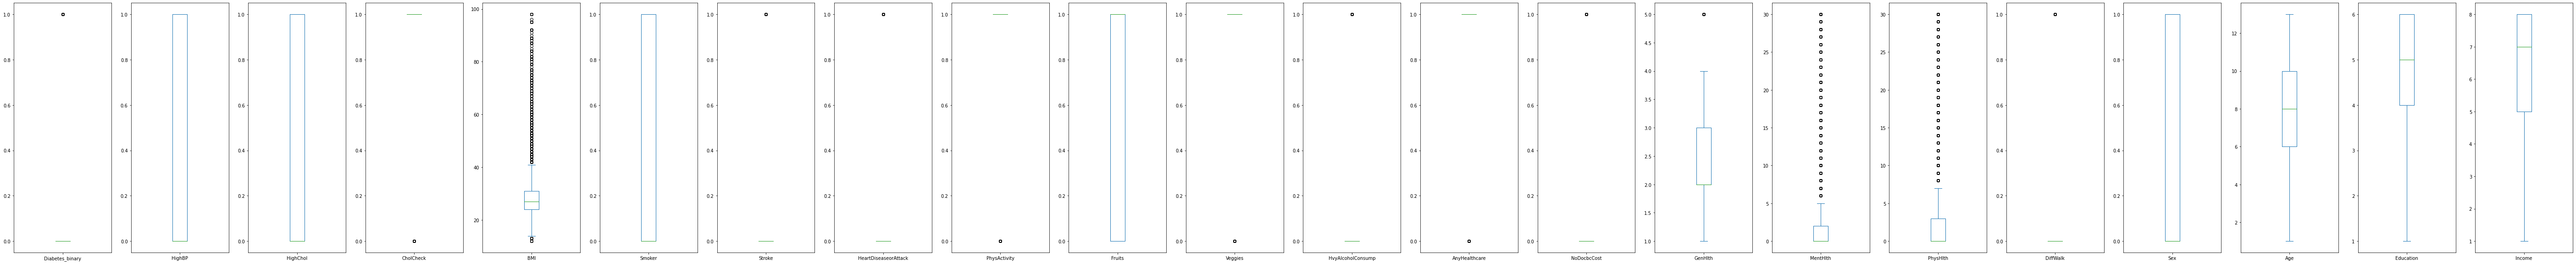

In [ ]:
#criar gráfico de caixas (boxplot)
dataset.plot(kind='box', subplots=True, figsize=(100, 10))
plt.show()

No gráfico, foi possível observar a presença de *outliers* (pontos fora da curva), que podem estar impactando o desempenho do algoritmo.

No entanto, em algumas variáveis que são classificadas binariamente (como Diabetes_binary), os valores que possuem menos ocorrências (nesse caso seria a classificação 1) foram identificados como *outliers*. Isso pode ter sido causado pelo desbalanceamento.

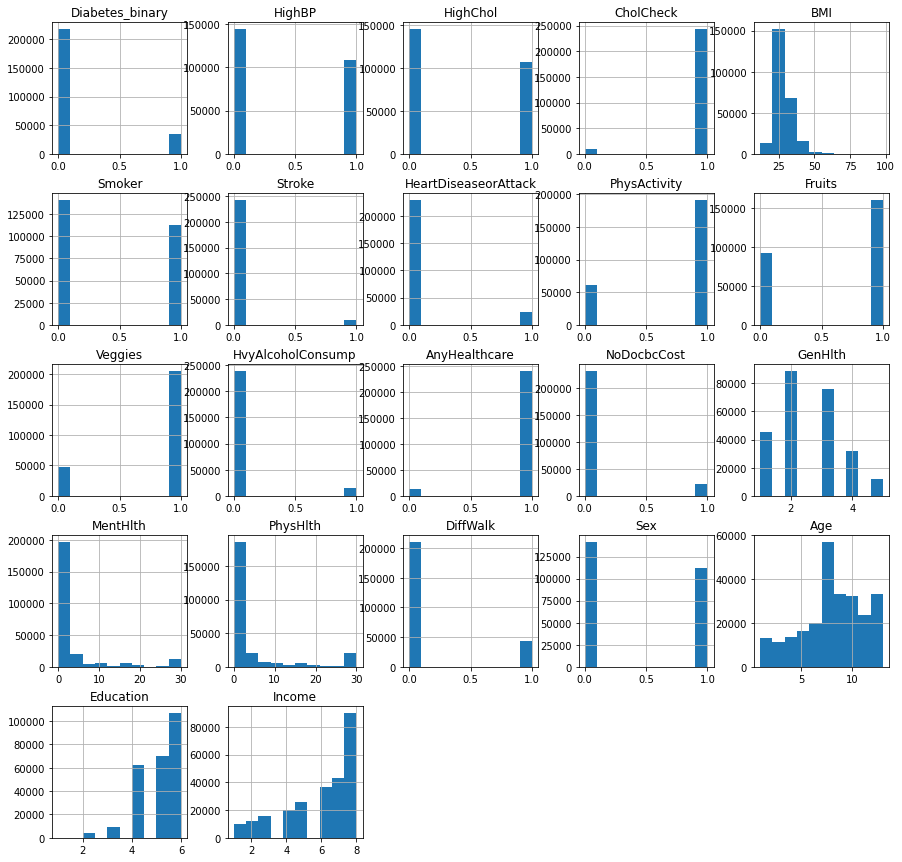

In [ ]:
# histogramas - diagramas de uma variável
dataset.hist()
plt.show()

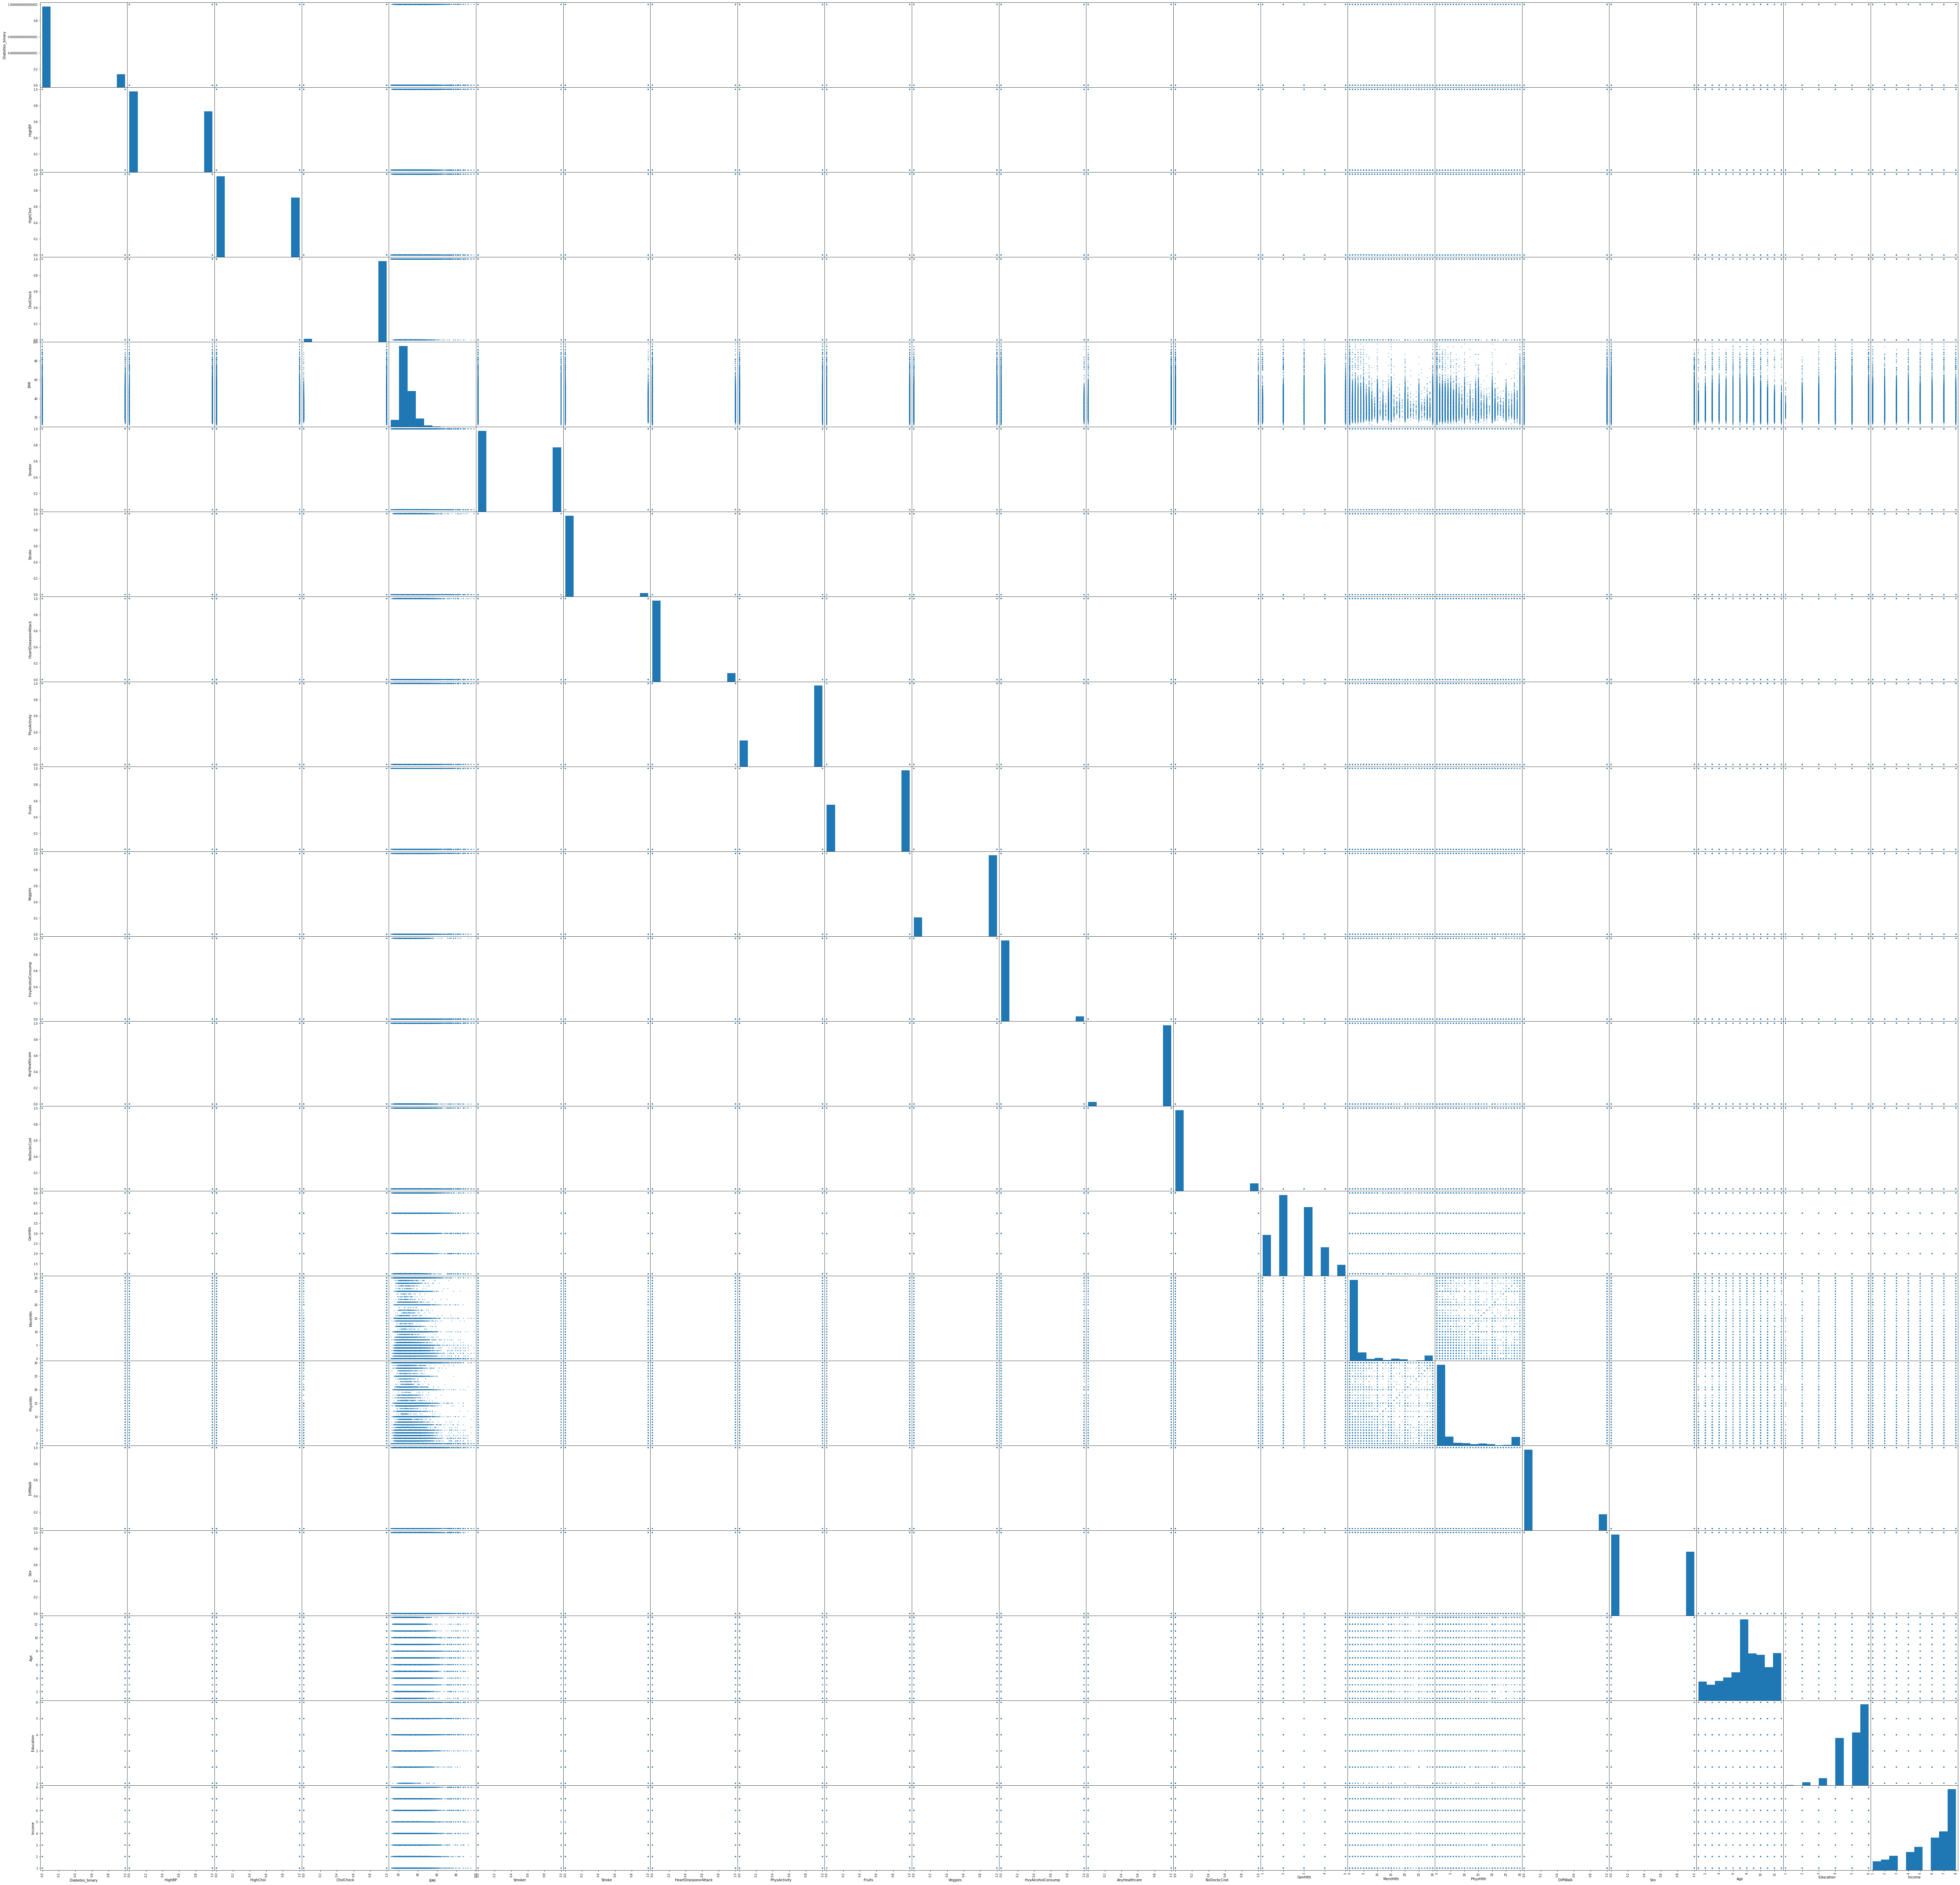

In [ ]:
# Gráficos Multivariados (observar presença de agrupamentos diagonais)
scatter_matrix(dataset, figsize=(100, 100))
plt.show()

Por terem muitas colunas e os valores das colunas não variarem muito, a análise ficou bem difícil.

In [ ]:
# Dividindo dataset
array = dataset.values
X = array[:,1:21]
Y = array[:,0:1]
validation_size = 0.20 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)

In [ ]:
#treinando o classificador
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#fazendo predições
Y_pred = classifier.predict(X_validation)

In [ ]:
print(confusion_matrix(Y_validation, Y_pred))
print(classification_report(Y_validation, Y_pred))

[[38485  5184]
 [ 4920  2147]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     43669
         1.0       0.29      0.30      0.30      7067

    accuracy                           0.80     50736
   macro avg       0.59      0.59      0.59     50736
weighted avg       0.80      0.80      0.80     50736



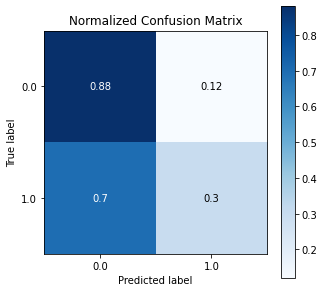

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_validation, Y_pred, normalize=True, figsize=(5,5))

Pode-se visualizar que para a classificação 0 (sem diabetes) o algoritmo conseguiu prever corretamente (Verdadeiros Positivos) 88% dos casos de teste, o que já é um resultado bom. Já para a classificação 1 (com diabetes ou pré-diabetes), o algoritmo acertou apenas 30% dos casos.

# Melhorias

## Verificação de valores nulos

A verificação de valores nulos permite identificar quantos valores ausentes estão presentes no dataset e excluí-los para não interferir no algoritmo.

Dessa forma, o método *info()* foi utilizado para verificar o tipo dos valores e a quantidade de valores não nulos.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

A partir disso, foi possível identificar que todos os dados do dataset eram representados por números do tipo *float64* e que todos os valores eram não-nulos. 

Para comprovar essa última afirmação, foram utilizados os métodos *isna().sum()*, para printar a soma dos valores nulos de cada coluna:

In [ ]:
print('Número de valores nulos em diferentes colunas: ')
print('--------------------------------------------------')
print(dataset.isna().sum())
print('--------------------------------------------------')

Número de valores nulos em diferentes colunas: 
--------------------------------------------------
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
--------------------------------------------------


O resultado de todas foi zero, o que comprova o fato de que o dataset não possui valores nulos. Por tanto, esse fator não afeta o desempenho do algoritmo.


## Balanceamento Under Sampling

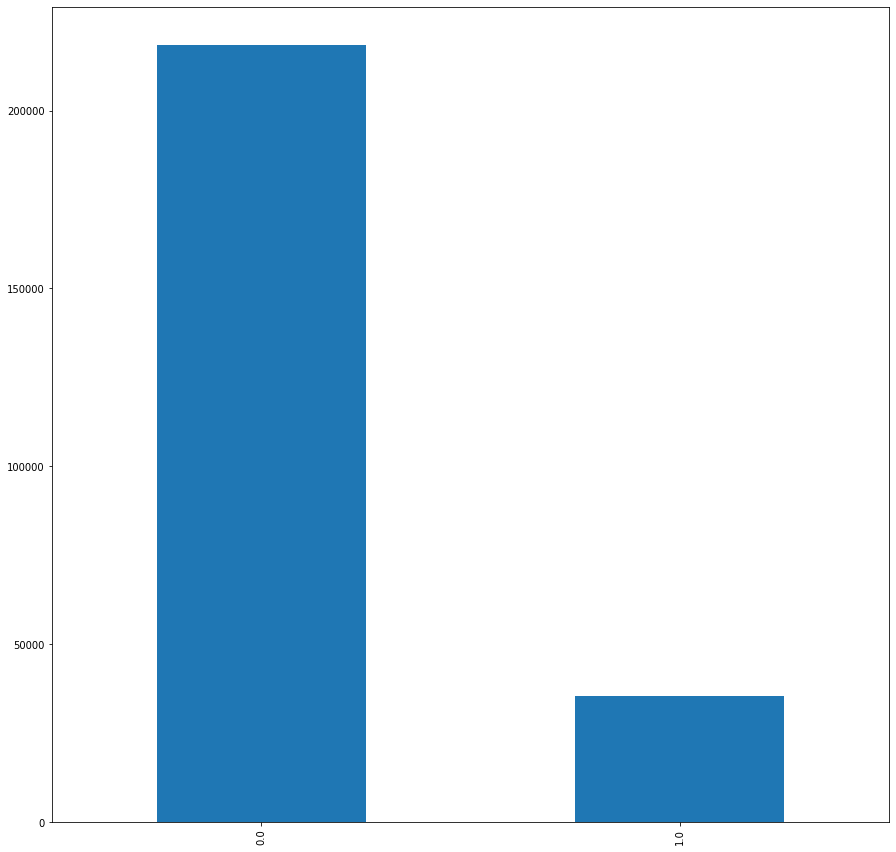

In [ ]:
# gráfico de distribuição por classes
dataset['Diabetes_binary'].value_counts().plot(kind = 'bar')

In [ ]:
# dividindo as classes
class0 = dataset[dataset['Diabetes_binary'] == 0]
class1 = dataset[dataset['Diabetes_binary'] == 1]

In [ ]:
# fazendo o under sampling da classe majoritária 
class0_under = class0.sample(len(class1), replace=True)

In [ ]:
# criando um dataframe novo com a classe gerada
under_dataset = pd.concat([class0_under, class1], axis=0)

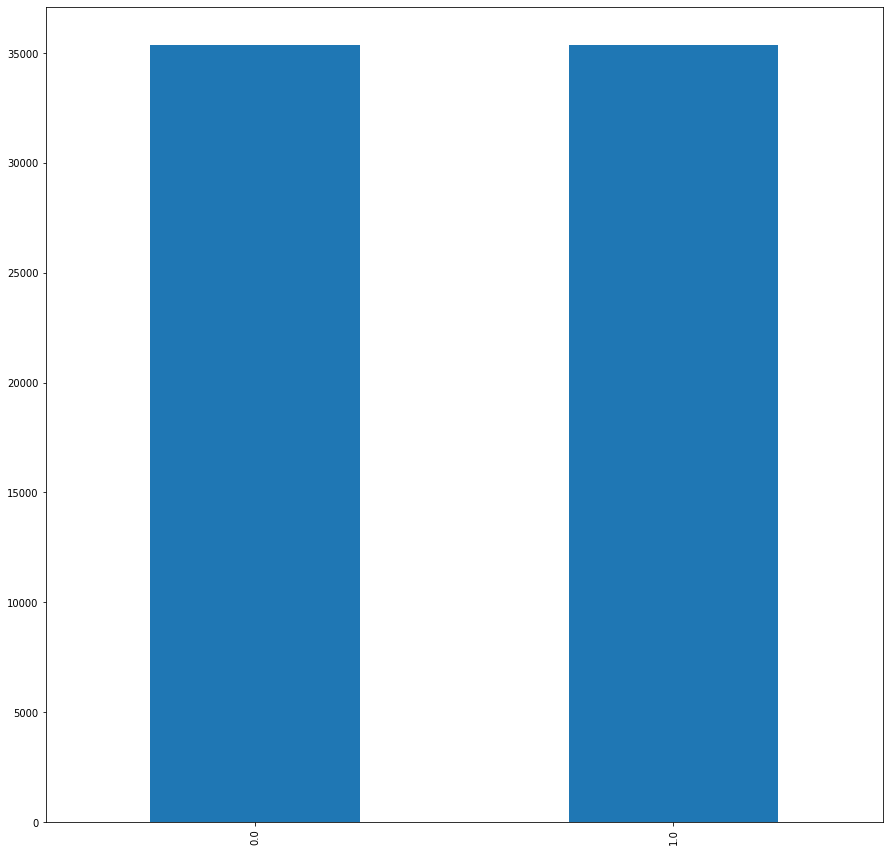

In [ ]:
# plotando gráfico de distribuição por classes após o Over Sampling"
under_dataset['Diabetes_binary'].value_counts().plot(kind='bar')

### Resultado

In [ ]:
# Dividindo dataset
array = under_dataset.values
X = array[:,1:21]
Y = array[:,0:1]
validation_size = 0.20 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)

In [ ]:
#treinando o classificador
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#fazendo predições
Y_pred = classifier.predict(X_validation)

In [ ]:
print(confusion_matrix(Y_validation, Y_pred))
print(classification_report(Y_validation, Y_pred))

[[4922 2176]
 [2401 4640]]
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      7098
         1.0       0.68      0.66      0.67      7041

    accuracy                           0.68     14139
   macro avg       0.68      0.68      0.68     14139
weighted avg       0.68      0.68      0.68     14139



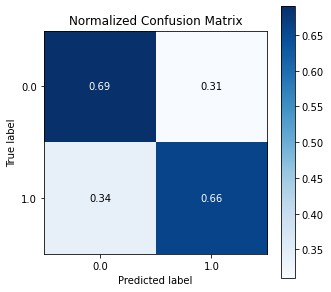

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_validation, Y_pred, normalize=True, figsize=(5,5))

## Balanceamento Over Sampling

O desbalanceamento de dados é um fator que pode impactar diretamente o algoritmo de classificação. Isso porque ele irá realizar muito bem a classificação da classe majoritária, mas não terá o mesmo desempenho na minoritária.

O que pode acontecer nesse caso é que esse desequilíbrio (mais casos sem diabetes) acaba tendenciando o algoritmo, o que faz ele classificar erroneamente entradas para classe minoritária. Isso foi visto anteriormente, onde mesmo com acurácia alta, o algoritmo teve um desempenho mais baixo na previsão de indivíduos com diabetes ou pré-diabetes do que os sem.

Para contornar o problema do mal balanceamento da base de dados, é possível utilizar 2 abordagens. A primeira, chamada de *Over Sampling*, pretende criar novos valores para classe minoritária a partir das informações dos dados originais. Já a segunda, se chama *Under Sasmpling* e pretende reduzir os valores da classe majoritária.

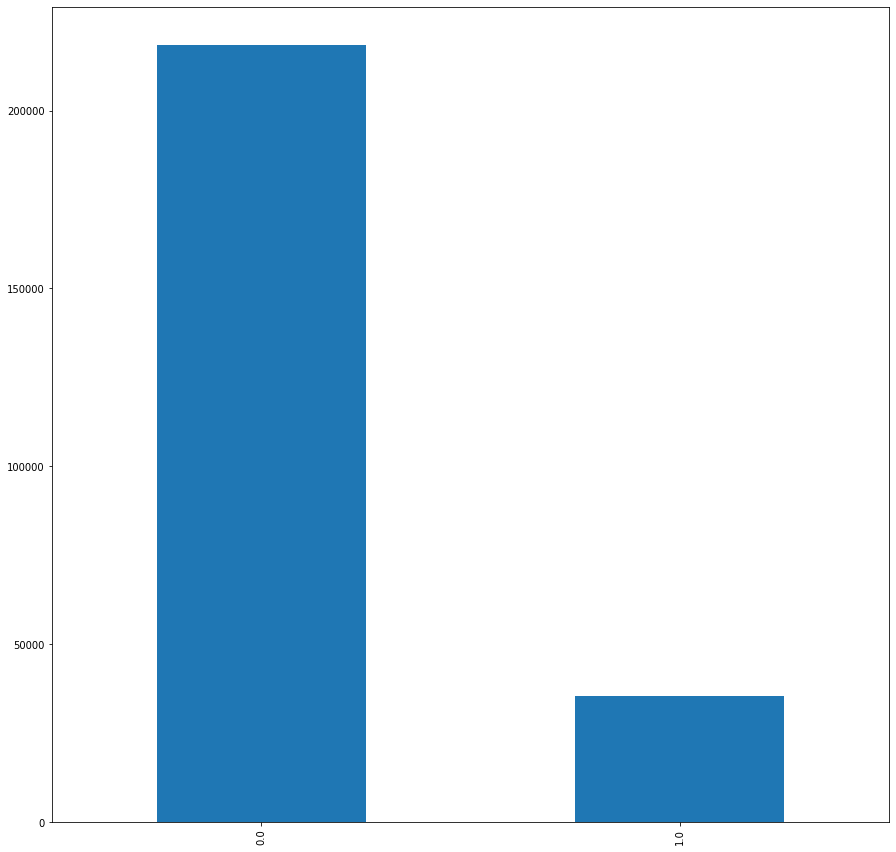

In [ ]:
# gráfico de distribuição por classes
dataset['Diabetes_binary'].value_counts().plot(kind = 'bar')

In [ ]:
# dividindo as classes
class0 = dataset[dataset['Diabetes_binary'] == 0]
class1 = dataset[dataset['Diabetes_binary'] == 1]

In [ ]:
# fazendo o over sampling da classe minoritária
class1_over = class1.sample(len(class0), replace=True)

In [ ]:
# criando um dataframe novo com a classe gerada
over_dataset = pd.concat([class0, class1_over], axis=0)

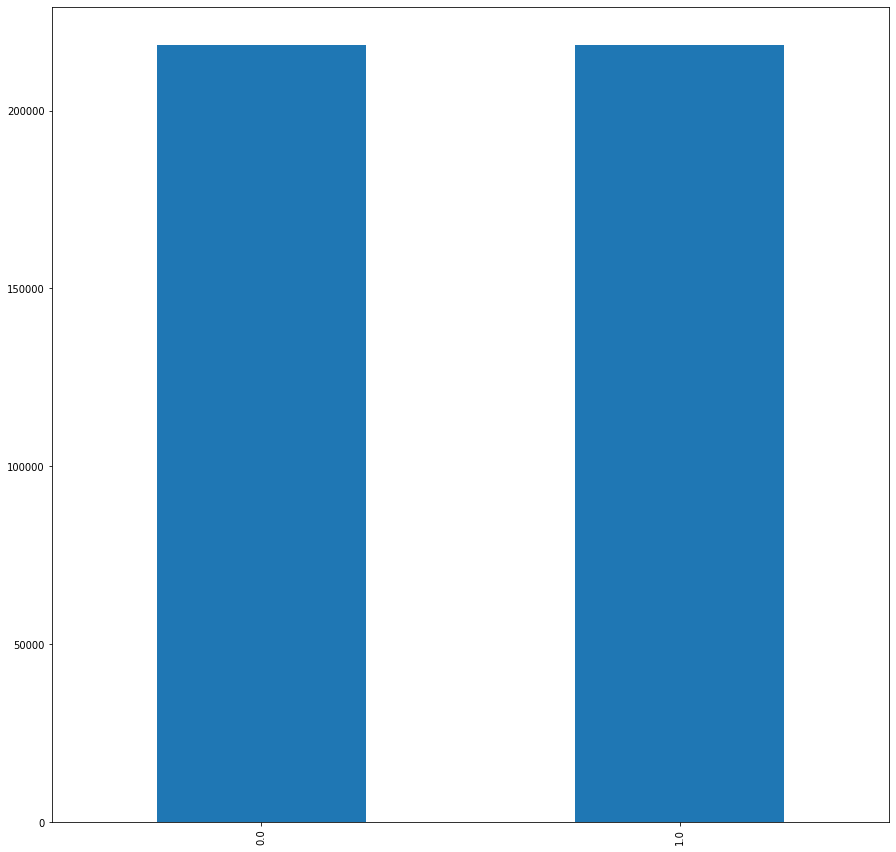

In [ ]:
# plotando gráfico de distribuição por classes após o Over Sampling"
over_dataset['Diabetes_binary'].value_counts().plot(kind='bar')

### Resultado

In [ ]:
# Dividindo dataset
array = over_dataset.values
X = array[:,1:21]
Y = array[:,0:1]
validation_size = 0.20 
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)

In [ ]:
#treinando o classificador
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#fazendo predições
Y_pred = classifier.predict(X_validation)

In [ ]:
print(confusion_matrix(Y_validation, Y_pred))
print(classification_report(Y_validation, Y_pred))

[[37284  6511]
 [  816 42723]]
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     43795
         1.0       0.87      0.98      0.92     43539

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334



A acurácia aumentou consideravelmente de 0.81 para 0.92. Dessa forma, as melhorias foram efetivas.

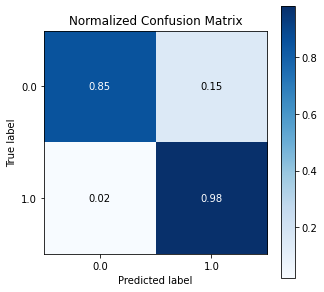

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_validation, Y_pred, normalize=True, figsize=(5,5))

Aqui podemos ver que, com as melhorias, foi possível aumentar a assertividade do algoritmo para a classe 1, foi de 32% para 98%. Mesmo com a classe 2 reduzindo em 3%, os ganhos foram maiores que as perdas.